# Training and testing

In this exercise you will apply the **training and testing** workflow to **titanic** dataset. And we are going to use **Decision Tree** to fit the dataset. 

In [1]:
import os, sys
import numpy as np
import pandas as pd

DATASET = '/dsa/data/all_datasets/titanic_ML/titanic.csv'
assert os.path.exists(DATASET)

Now go ahead and `import DecistionTree`, `train_test_split()`, and other required packages.

In [2]:
# Add your code below this comment (Question #E01)
# ----------------------------------


from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline  
from sklearn.dummy import DummyClassifier

## Load Dataset

**Load dataset** from files into multi-dimensional array and understand its structure.

Note that this .csv file is comma separated. **Shuffle the dataset using the `.sample()` and `.reset_index()` method.**

In [3]:
# Add your code below this comment (Question #E02)
# ----------------------------------
dataset = pd.read_csv(DATASET, sep = ',').sample(frac = 1).reset_index(drop = True)
dataset.head



<bound method NDFrame.head of      pclass  sex   age  sibsp  parch      fare  embarked  survived
0         3    1  25.0      0      0    0.0000         1         1
1         1    1  20.0      0      0   27.7208         0         0
2         1    0  42.0      0      0  227.5250         0         1
3         1    0  54.0      1      0   59.4000         0         1
4         3    1  27.0      0      0    7.8958         1         0
..      ...  ...   ...    ...    ...       ...       ...       ...
885       2    0  36.0      0      0   13.0000         1         1
886       1    0  35.0      1      0   83.4750         1         1
887       3    1  20.5      0      0    7.2500         1         0
888       2    1  57.0      0      0   12.3500         2         0
889       2    1  28.0      0      0   26.0000         1         0

[890 rows x 8 columns]>

Print **number of rows**.

In [4]:
# Add your code below this comment (Question #E03)
# ----------------------------------
print(len(dataset.index))



890


**Describe the dataset**.

In [5]:
# Add your code below this comment (Question #E04)
# ----------------------------------
dataset.describe()


,pclass,sex,age,sibsp,parch,fare,embarked,survived
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.312360,0.642697,29.548697,0.503371,0.351685,32.865772,0.895506,0.389888
std,0.837241,0.479475,13.379025,1.095286,0.790069,52.639685,0.529535,0.487999
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,13.775000,1.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,0.000000,29.925000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,1.000000


**Store feature columns** (all except column 'survived') to a new variable `X`.

In [6]:
# Add your code below this comment (Question #E05)
# ----------------------------------
X = np.array(dataset.iloc[:,:-1])  # Slice out your training data





**Store label column** (last column 'survived') to a new variable `y`.

In [7]:
# Add your code below this comment (Question #E06)
# ----------------------------------
y = np.array(dataset.survived)


**Create training/test split** off of `X` and `y`. Test dataset ratio: 25%.

In [8]:
# Add your code below this comment (Question #E07)
# ----------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



**Create a decision tree model**, then **fit and score** the classifier.

Note that the model score will not be important for grading purpose in this exercise.

In [9]:
# Add your code below this comment (Question #E08)
# ----------------------------------
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))




0.8295964125560538


**Visualize the decision  tree**


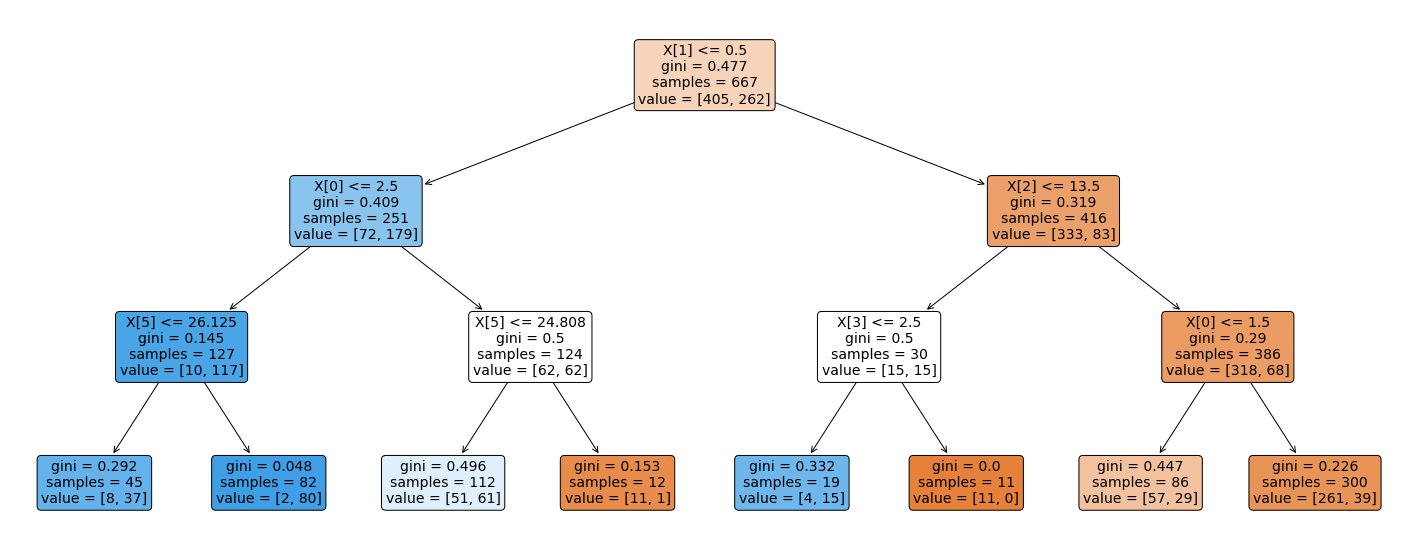

In [10]:
# Add your code below this comment (Question #E09)
# ----------------------------------
plt.figure(figsize=(25,10))
a = plot_tree(model, 
              filled=True, 
              rounded=True, 
              fontsize=14)

**Compare your decision tree model against a baseline**

In [11]:
# Add your code below this comment (Question #E10)
# ----------------------------------
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X,y)
print(f"Baseline Accuracy Most Frequent Strategy : {dummy_model.score(X,y)}")

print(f'Accuracy Decision Tree : {model.score(X_test, y_test)}')
print('Decision Tree acuraccy is higher than baseline accuracy')

Baseline Accuracy Most Frequent Strategy : 0.6101123595505618
Accuracy Decision Tree : 0.8295964125560538
Decision Tree acuraccy is higher than baseline accuracy


# Save your notebook!  Then `File > Close and Halt`